In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(100)

%config InlineBackend.figure_format = 'retina'

import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = (1,1,1,1)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [2]:
df_sra = pd.read_csv('SraRunTable.txt')
df_sra.head()

,Run,Assay Type,AvgSpotLen,Bases,BioProject,BioSample,Bytes,Center Name,Consent,DATASTORE filetype,...,LibrarySource,Organism,patient_identifier,Platform,ReleaseDate,Sample Name,source_name,SRA Study,Tissue,Treatment
0,SRR3898683,RNA-Seq,136,8476342120,PRJNA328986,SAMN05389348,4656807998,GEO,public,"fastq,sra",...,TRANSCRIPTOMIC,Homo sapiens,C552,ILLUMINA,2017-03-28T00:00:00Z,GSM2232185,liver biopsy,SRP078450,liver,None
1,SRR3898684,RNA-Seq,136,8552139136,PRJNA328986,SAMN05389349,4693500263,GEO,public,"fastq,sra",...,TRANSCRIPTOMIC,Homo sapiens,A748,ILLUMINA,2017-03-28T00:00:00Z,GSM2232186,liver biopsy,SRP078450,liver,None
2,SRR3898686,RNA-Seq,201,19384010865,PRJNA328986,SAMN05389352,10656126125,GEO,public,"sra,unknown_contigs,fastq",...,TRANSCRIPTOMIC,Homo sapiens,B254,ILLUMINA,2017-03-28T00:00:00Z,GSM2232188,liver biopsy,SRP078450,liver,None
3,SRR3898688,RNA-Seq,136,9161142920,PRJNA328986,SAMN05389354,5200759678,GEO,public,"sra,fastq,unknown_contigs",...,TRANSCRIPTOMIC,Homo sapiens,B136,ILLUMINA,2017-03-28T00:00:00Z,GSM2232190,liver biopsy,SRP078450,liver,None
4,SRR3898690,RNA-Seq,136,7728045504,PRJNA328986,SAMN05389356,4238735753,GEO,public,"unknown_contigs,sra,fastq",...,TRANSCRIPTOMIC,Homo sapiens,A707,ILLUMINA,2017-03-28T00:00:00Z,GSM2232192,liver biopsy,SRP078450,liver,None


In [3]:
df_sra['Layout'] = 'SE'
df_sra['Name'] = df_sra['Run']

In [4]:
df_sra[['Name', 'Run', 'Layout', 'infection_status']].to_csv('input.VIRTUS.csv', index=None)

In [5]:
!head input.VIRTUS.csv

Name,Run,Layout,infection_status
SRR3898683,SRR3898683,SE,HCV
SRR3898684,SRR3898684,SE,HCV
SRR3898686,SRR3898686,SE,HCV
SRR3898688,SRR3898688,SE,HCV
SRR3898690,SRR3898690,SE,HCV
SRR3898693,SRR3898693,SE,HCV
SRR3898695,SRR3898695,SE,HCV
SRR3898698,SRR3898698,SE,HCV
SRR3898700,SRR3898700,SE,HCV


In [6]:
for s in df_sra.Run:
    print('cp {s}/virus.counts.final.tsv VIRTUS_res/{s}_virus.counts.final.tsv '.format(s=s))

cp SRR3898683/virus.counts.final.tsv VIRTUS_res/SRR3898683_virus.counts.final.tsv 
cp SRR3898684/virus.counts.final.tsv VIRTUS_res/SRR3898684_virus.counts.final.tsv 
cp SRR3898686/virus.counts.final.tsv VIRTUS_res/SRR3898686_virus.counts.final.tsv 
cp SRR3898688/virus.counts.final.tsv VIRTUS_res/SRR3898688_virus.counts.final.tsv 
cp SRR3898690/virus.counts.final.tsv VIRTUS_res/SRR3898690_virus.counts.final.tsv 
cp SRR3898693/virus.counts.final.tsv VIRTUS_res/SRR3898693_virus.counts.final.tsv 
cp SRR3898695/virus.counts.final.tsv VIRTUS_res/SRR3898695_virus.counts.final.tsv 
cp SRR3898698/virus.counts.final.tsv VIRTUS_res/SRR3898698_virus.counts.final.tsv 
cp SRR3898700/virus.counts.final.tsv VIRTUS_res/SRR3898700_virus.counts.final.tsv 
cp SRR3898703/virus.counts.final.tsv VIRTUS_res/SRR3898703_virus.counts.final.tsv 
cp SRR3898704/virus.counts.final.tsv VIRTUS_res/SRR3898704_virus.counts.final.tsv 
cp SRR3898706/virus.counts.final.tsv VIRTUS_res/SRR3898706_virus.counts.final.tsv 
cp S

In [14]:
df_sra.index = df_sra['Run']

In [7]:
i = 0
for pos,row in df_sra.iterrows():
    s = row['Run']
    n = s
    d = pd.read_csv('VIRTUS_res/{}_virus.counts.final.tsv'.format(s), sep='\t')
    
    d.columns = ['virus', n, 'rate']
    d = d[['virus', n]]
    
    if i == 0:
        df_virtus = d.copy()
        i = 1
    else:
        df_virtus = pd.merge(df_virtus, d, how="outer")
        
df_virtus = df_virtus.fillna(0)

df_virtus.index = df_virtus.virus
# df_virtect = df_virtect.drop('virus')
df_virtus = df_virtus.drop(columns=['virus'])
# df_virtus = df_virtus.sort_values(by='0', ascending=False)
df_virtus.head()

,SRR3898683,SRR3898684,SRR3898686,SRR3898688,SRR3898690,SRR3898693,SRR3898695,SRR3898698,SRR3898700,SRR3898703,...,SRR3898691,SRR3898694,SRR3898696,SRR3898697,SRR3898699,SRR3898701,SRR3898705,SRR3898717,SRR3898718,SRR3898720
virus,,,,,,,,,,,,,,,,,,,,,
NC_022518.1_Human_endogenous_retrovirus_K113_complete_genome,1615.0,2315.0,2479.0,2577.0,1820.0,1781.0,1904.0,2571.0,871.0,1868.0,...,1641.0,1990.0,2734.0,1315.0,1926.0,2734.0,2843.0,1346.0,2160.0,1936.0
"NC_009825.1_Hepatitis_C_virus_genotype_4,_genome",10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,0.0,23.0,0.0,0.0,0.0,0.0
"NC_003977.1_Hepatitis_B_virus,_complete_genome",4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
"NC_004102.1_Hepatitis_C_virus_genotype_1,_complete_genome",2.0,6.0,0.0,147.0,10.0,1.0,3.0,13.0,1.0,14.0,...,3.0,120.0,10.0,9.0,4.0,0.0,2.0,5.0,4.0,77.0
"NC_001499.1_Abelson_murine_leukemia_virus,_complete_genome",1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [8]:
cutoff = 10

df_virtus_cutoff = df_virtus.copy()
df_virtus_cutoff = df_virtus_cutoff.mask(df_virtus_cutoff < cutoff, 0)
df_virtus_cutoff = df_virtus_cutoff[df_virtus_cutoff.sum(axis=1) > 0]

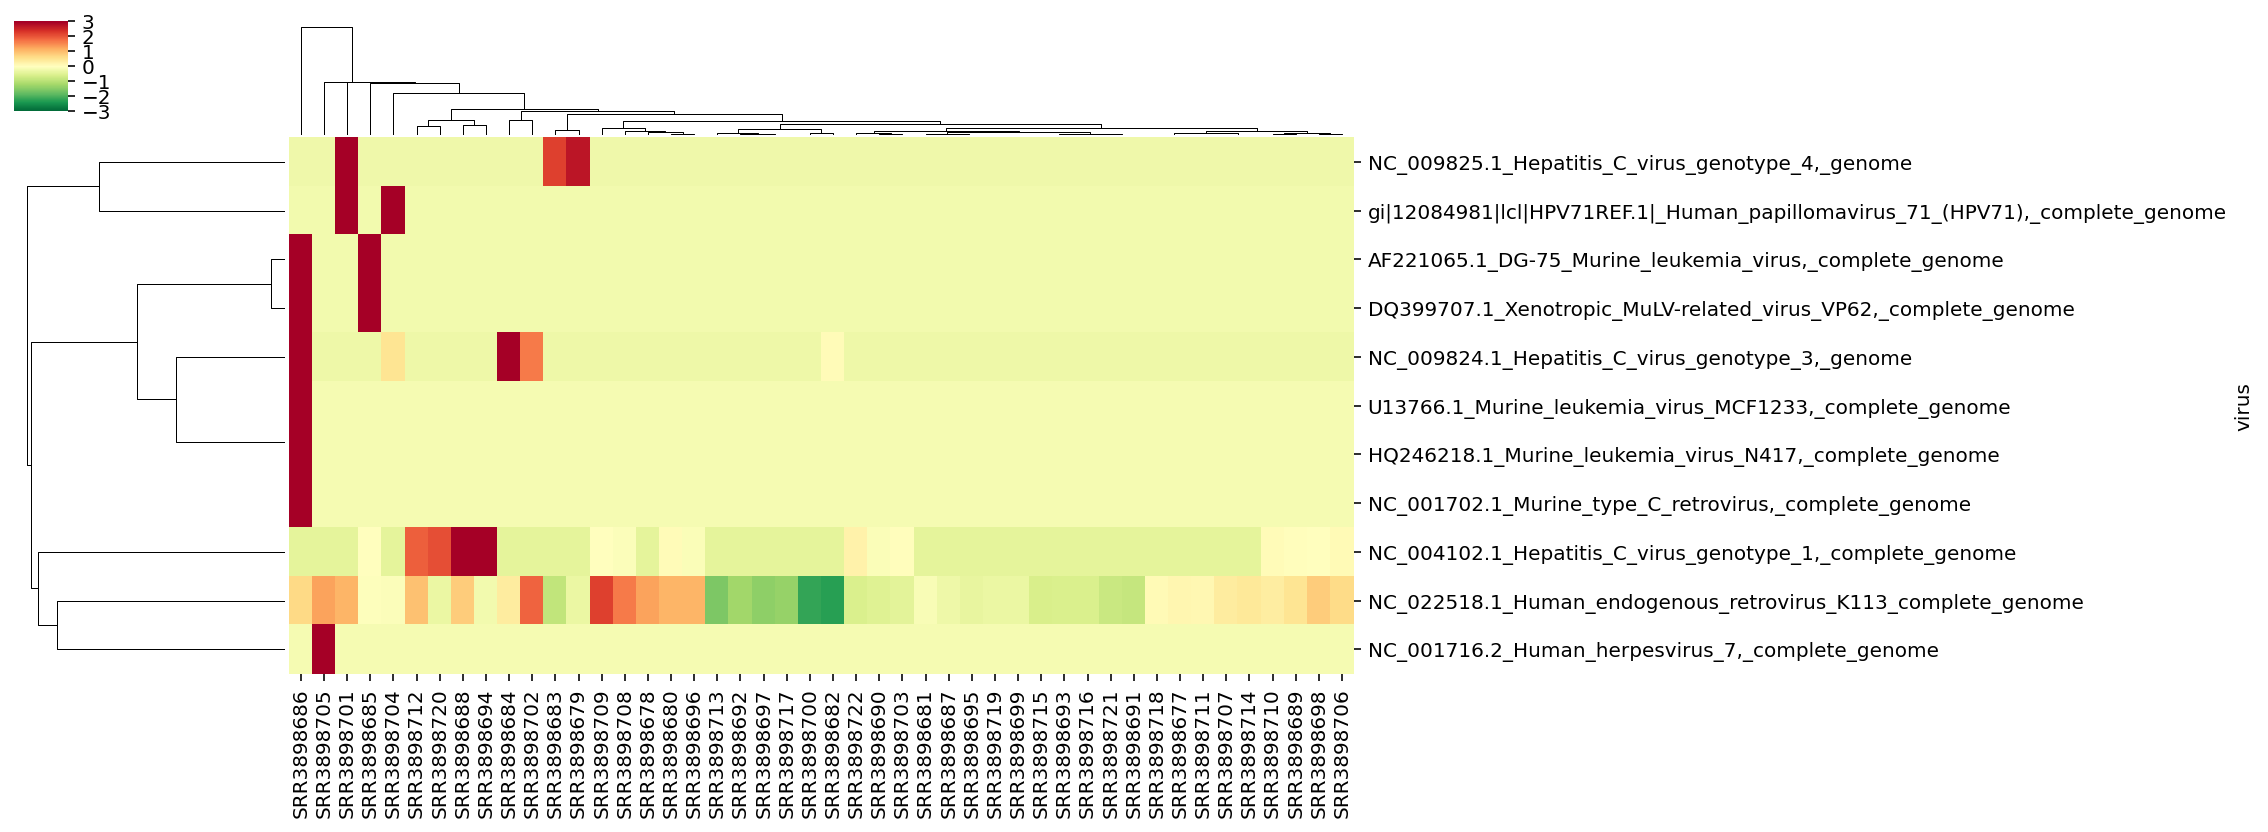

In [9]:
sns.clustermap(df_virtus_cutoff, z_score=0, cmap='RdYlGn_r', vmax=3, vmin=-3, figsize=(12,6))

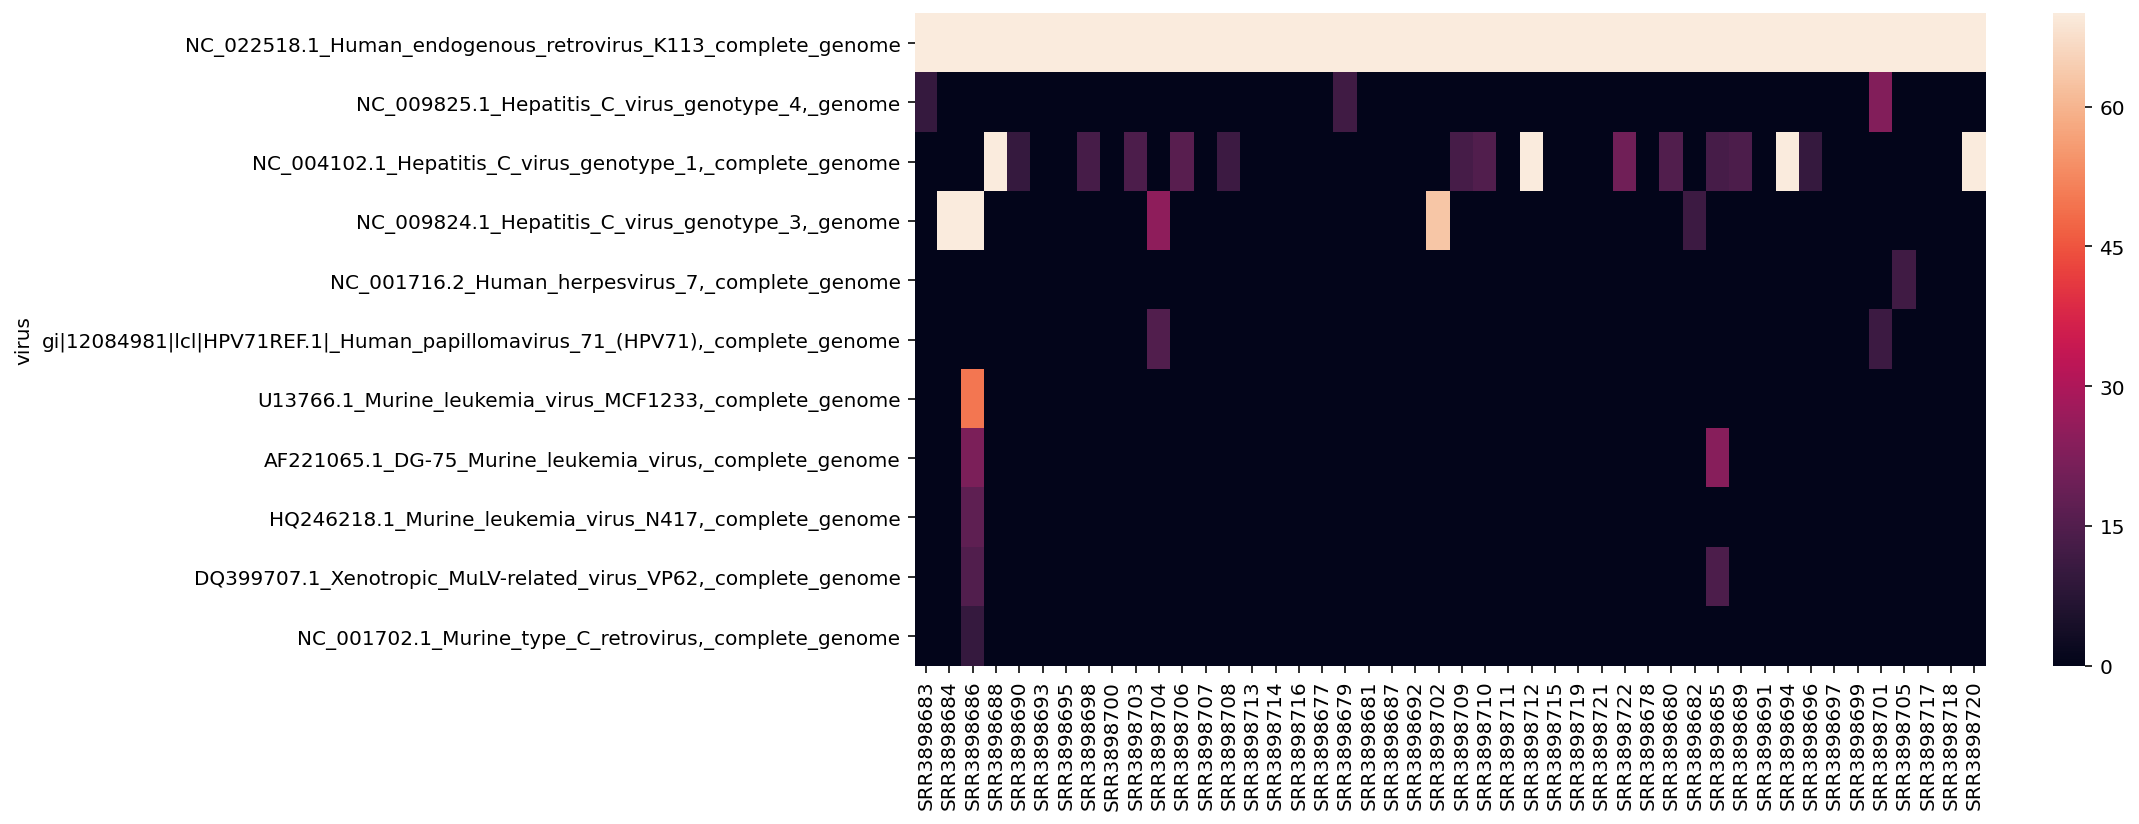

In [10]:
plt.figure(figsize=(12,6))
sns.heatmap(df_virtus_cutoff, vmin=0, vmax=70)
# plt.savefig('img/heatmap.VIRTUS.pdf', bbox_inches='tight')

In [13]:
df_virtus.columns

Index(['SRR3898683', 'SRR3898684', 'SRR3898686', 'SRR3898688', 'SRR3898690',
       'SRR3898693', 'SRR3898695', 'SRR3898698', 'SRR3898700', 'SRR3898703',
       'SRR3898704', 'SRR3898706', 'SRR3898707', 'SRR3898708', 'SRR3898713',
       'SRR3898714', 'SRR3898716', 'SRR3898677', 'SRR3898679', 'SRR3898681',
       'SRR3898687', 'SRR3898692', 'SRR3898702', 'SRR3898709', 'SRR3898710',
       'SRR3898711', 'SRR3898712', 'SRR3898715', 'SRR3898719', 'SRR3898721',
       'SRR3898722', 'SRR3898678', 'SRR3898680', 'SRR3898682', 'SRR3898685',
       'SRR3898689', 'SRR3898691', 'SRR3898694', 'SRR3898696', 'SRR3898697',
       'SRR3898699', 'SRR3898701', 'SRR3898705', 'SRR3898717', 'SRR3898718',
       'SRR3898720'],
      dtype='object')

In [21]:
df_virtus_hcv = df_virtus.loc[[x for x in df_virtus.index if 'Hepatitis_C' in x]]
df_virtus_hcv

,SRR3898683,SRR3898684,SRR3898686,SRR3898688,SRR3898690,SRR3898693,SRR3898695,SRR3898698,SRR3898700,SRR3898703,...,SRR3898691,SRR3898694,SRR3898696,SRR3898697,SRR3898699,SRR3898701,SRR3898705,SRR3898717,SRR3898718,SRR3898720
virus,,,,,,,,,,,,,,,,,,,,,
"NC_009825.1_Hepatitis_C_virus_genotype_4,_genome",10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,0.0,23.0,0.0,0.0,0.0,0.0
"NC_004102.1_Hepatitis_C_virus_genotype_1,_complete_genome",2.0,6.0,0.0,147.0,10.0,1.0,3.0,13.0,1.0,14.0,...,3.0,120.0,10.0,9.0,4.0,0.0,2.0,5.0,4.0,77.0
"NC_009827.1_Hepatitis_C_virus_genotype_6,_complete_genome",1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,...,1.0,0.0,2.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0
"NC_009824.1_Hepatitis_C_virus_genotype_3,_genome",0.0,110.0,185.0,0.0,0.0,0.0,4.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
"NC_009823.1_Hepatitis_C_virus_genotype_2,_complete_genome",0.0,1.0,0.0,0.0,3.0,4.0,3.0,0.0,0.0,5.0,...,5.0,1.0,6.0,5.0,0.0,2.0,0.0,1.0,2.0,1.0
"NC_009826.1_Hepatitis_C_virus_genotype_5,_genome",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


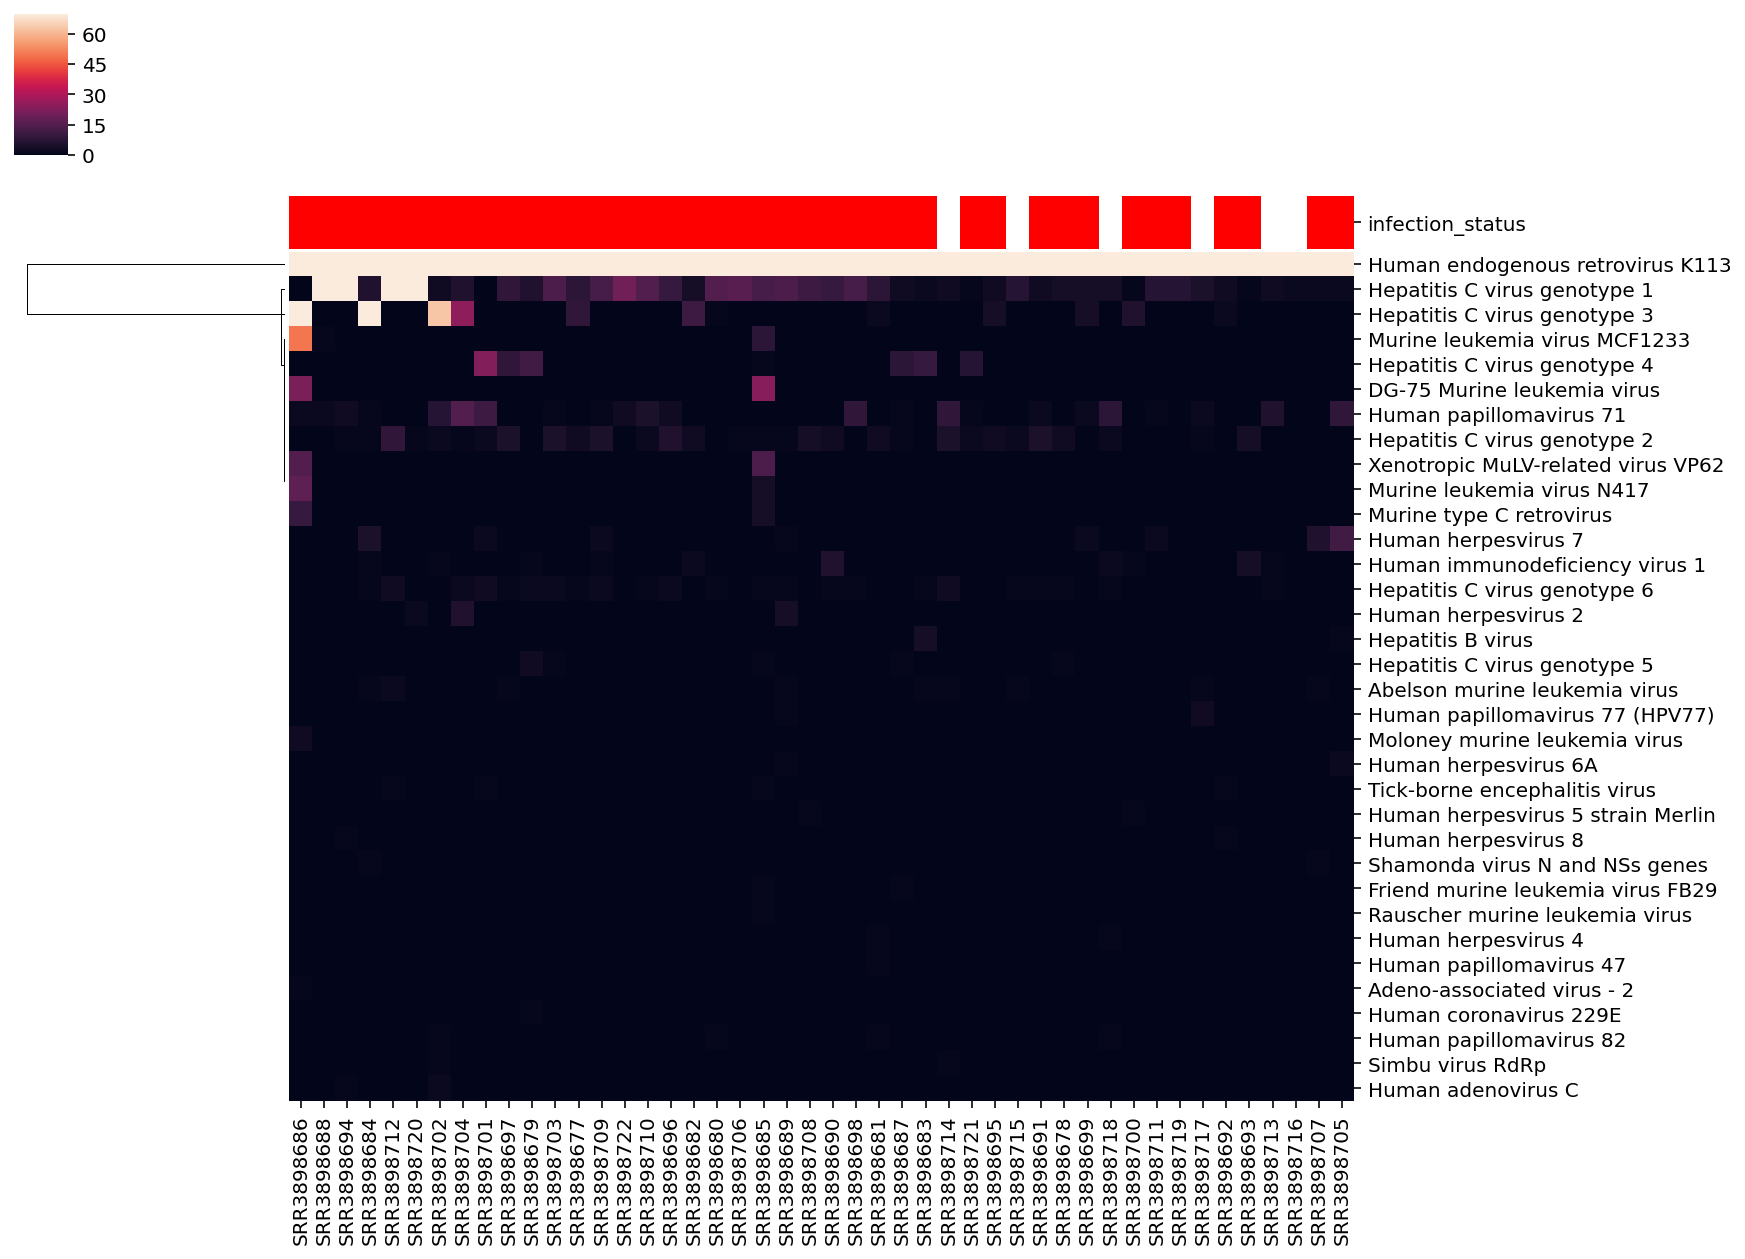

In [59]:
# df_sra.loc[df_virtus.columns, 'infection_status']

lut = dict(zip(['HCV', 'non-HCV'], "rw"))
col_colors = df_sra.loc[df_virtus.columns, 'infection_status'].map(lut)
df_p = df_virtus[list(df_virtus_hcv.sum().sort_values(ascending=False).index)]

df_p.index = ['Human_endogenous_retrovirus_K113',
       'Hepatitis_C_virus_genotype_4',
       'Hepatitis_B_virus',
       'Hepatitis_C_virus_genotype_1',
       'Abelson_murine_leukemia_virus',
       'Hepatitis_C_virus_genotype_6',
       'Hepatitis_C_virus_genotype_3',
       'Human_herpesvirus_7',
       'Human_immunodeficiency_virus_1',
       'Hepatitis_C_virus_genotype_2',
       'Shamonda virus N and NSs genes',
       'Human_papillomavirus_71',
       'Murine_leukemia_virus_MCF1233',
       'DG-75_Murine_leukemia_virus',
       'Murine_leukemia_virus_N417',
       'Xenotropic_MuLV-related_virus_VP62',
       'Murine_type_C_retrovirus',
       'Moloney_murine_leukemia_virus',
       'Adeno-associated_virus_-_2',
       'Human_herpesvirus_5_strain_Merlin',
       'Hepatitis_C_virus_genotype_5',
       'Human_herpesvirus_2',
       'Simbu_virus_RdRp',
       'Human_coronavirus_229E',
       'Human_herpesvirus_4',
       'Human_papillomavirus_47',
       'Human_papillomavirus_82',
       'Friend_murine_leukemia_virus_FB29',
       'Tick-borne_encephalitis_virus',
       'Human_herpesvirus_8',
       'Human_adenovirus_C',
       'Rauscher_murine_leukemia_virus',
       'Human_herpesvirus_6A',
       'Human_papillomavirus_77_(HPV77)']
df_p.index = [x.replace('_', ' ') for x in df_p.index]

g = sns.clustermap(df_p, 
                   col_cluster=False, col_colors=col_colors, vmin=0, vmax=70, figsize=(12,10))
plt.savefig('img/heatmap.VIRTUS2.pdf', bbox_inches='tight')

In [131]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [151]:
list_max_hcv_reads = list(df_virtus_hcv.max())
list_infection_status = [x=='HCV' for x in df_sra.infection_status]

# roc = roc_curve(list_infection_status, list_max_hcv_reads)
fpr, tpr, thresholds = roc_curve(list_infection_status, list_max_hcv_reads)
roc_auc_score(list_infection_status, list_max_hcv_reads)

0.8583333333333333

In [152]:
pd.DataFrame([fpr, tpr, thresholds])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.000,0.000,0.000,0.00,0.000,0.000,0.0,0.0,0.166667,0.166667,0.500,0.666667,0.833333,1.0
1,0.0,0.025,0.275,0.375,0.45,0.475,0.525,0.6,0.7,0.775000,0.800000,0.825,0.925000,0.950000,1.0
2,186.0,185.000,16.000,14.000,13.00,12.000,11.000,10.0,8.0,7.000000,6.000000,5.000,4.000000,3.000000,2.0


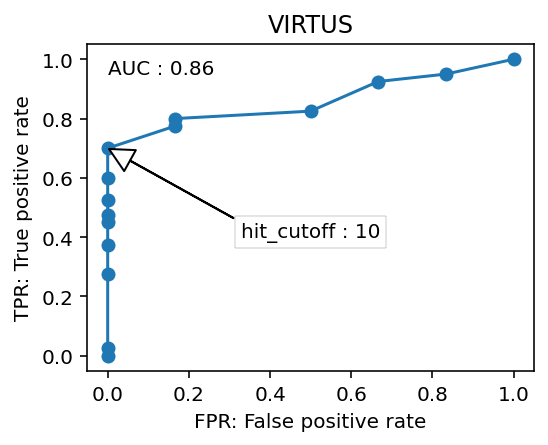

In [153]:
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.annotate('hit_cutoff : 10', xy=(0, 0.7), xytext=(0.5, 0.4),
             bbox=dict(boxstyle='square', fc='white', linewidth=0.1),
             arrowprops=dict(facecolor='white', shrink=0.01, width=0.1), 
             color='k', horizontalalignment='center')
plt.grid(False)
plt.text(0, 0.95 ,'AUC : 0.86')
plt.title('VIRTUS')
plt.savefig('img/ROC_VIRTUS.pdf', bbox_inches='tight')

## kraken2

In [30]:
i = 0
for pos,row in df_sra.iterrows():
    s = row['Run']
    n = s
    d = pd.read_csv('kraken2_rep_{}'.format(s), sep='\t', header=None)
    d.columns = ['percent', '-', s, 'code', 'ID', 'virus']
    d = d.loc[d['code'] == 'S', ['virus', s]]
#     d = d[d[s] > 0]

    if i==0:
        df_kraken2 = d.copy()
        i = 1
    else:
        df_kraken2 = pd.merge(df_kraken2, d, how="outer")
df_kraken2 = df_kraken2.fillna(0)

df_kraken2.index = df_kraken2.virus
# df_virtect = df_virtect.drop('virus')
df_kraken2 = df_kraken2.drop(columns=['virus'])
# df_kraken2 = df_kraken2.sort_values(by='0', ascending=False)
df_kraken2.head()

,SRR3898683,SRR3898684,SRR3898686,SRR3898688,SRR3898690,SRR3898693,SRR3898695,SRR3898698,SRR3898700,SRR3898703,...,SRR3898691,SRR3898694,SRR3898696,SRR3898697,SRR3898699,SRR3898701,SRR3898705,SRR3898717,SRR3898718,SRR3898720
virus,,,,,,,,,,,,,,,,,,,,,
Proteus phage VB_PmiS-Isfahan,159378.0,174450.0,233104.0,160912.0,180051.0,114110.0,144967.0,138672.0,94713.0,133042.0,...,148991.0,125257.0,156464.0,143993.0,115006.0,283707.0,196871.0,158446.0,160010.0,217147.0
Escherichia virus DE3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Enterobacteria phage phi80,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
Escherichia virus phiX174,11965.0,22115.0,12846.0,21458.0,24988.0,35590.0,22957.0,33768.0,14710.0,19031.0,...,28009.0,21424.0,27598.0,18544.0,21434.0,14682.0,24277.0,19434.0,20804.0,14557.0
Human endogenous retrovirus K,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


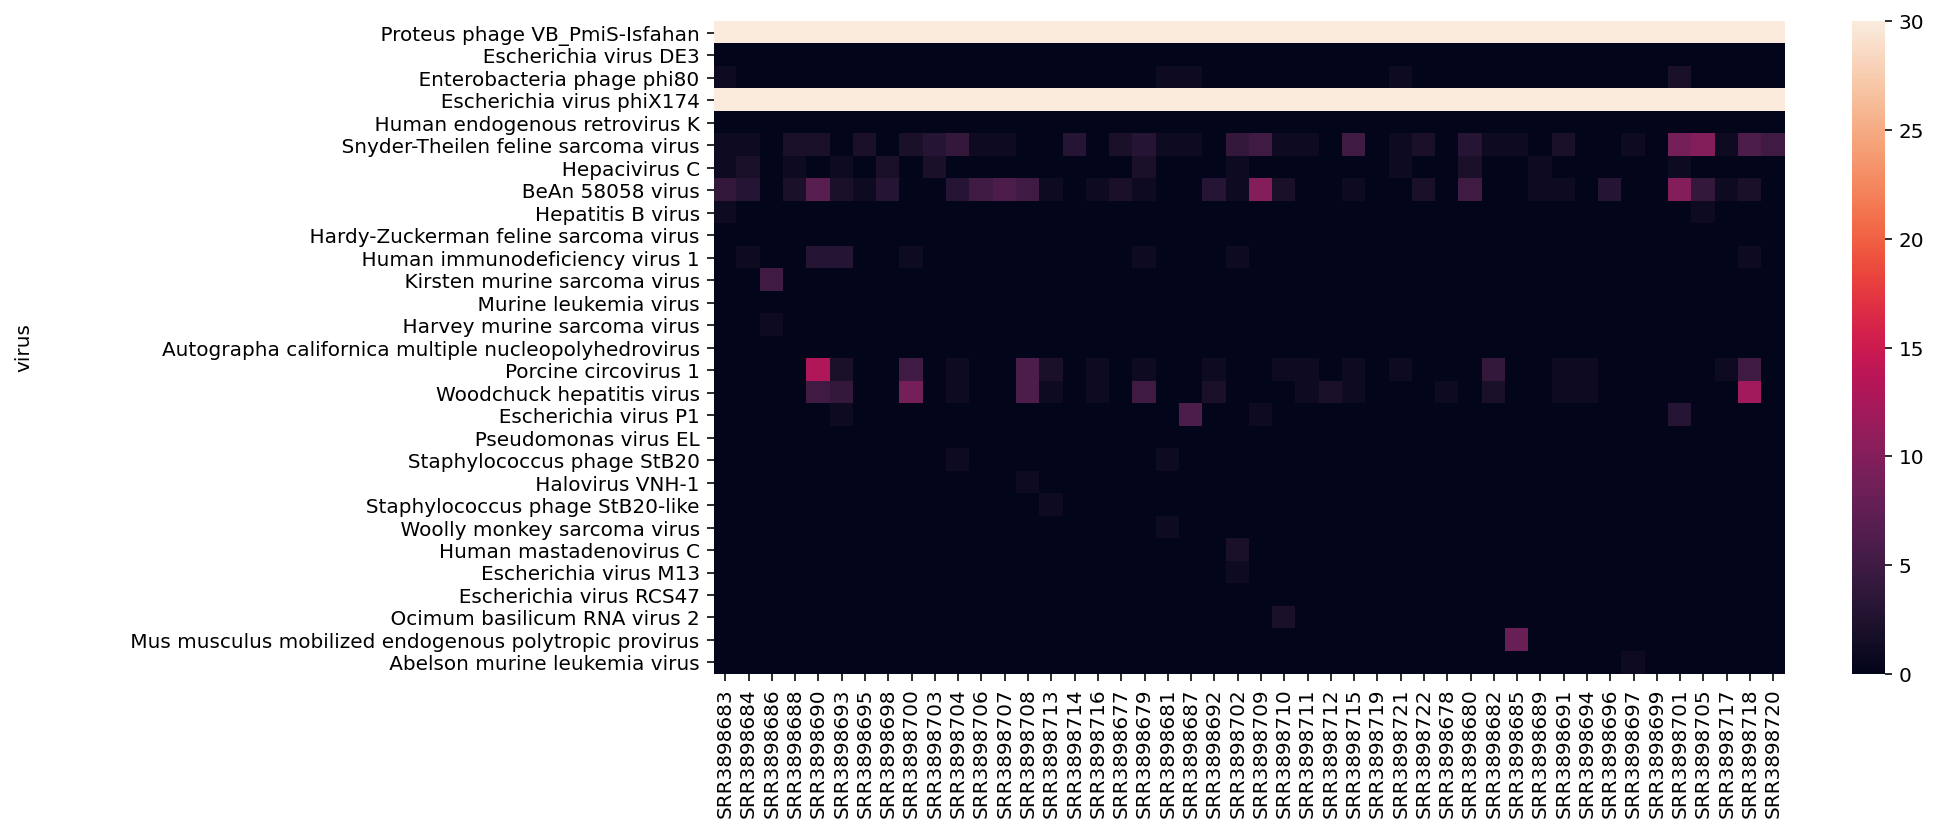

In [31]:
plt.figure(figsize=(12,6))
sns.heatmap(df_kraken2, vmin=0, vmax=30)
# plt.title('kraken2')
# plt.savefig('img/heatmap.kraken2.pdf', bbox_inches='tight')

In [38]:
list(df_kraken2.loc['          Hepacivirus C', :].sort_values(ascending=False).index)

['SRR3898684',
 'SRR3898698',
 'SRR3898703',
 'SRR3898679',
 'SRR3898680',
 'SRR3898702',
 'SRR3898689',
 'SRR3898688',
 'SRR3898693',
 'SRR3898721',
 'SRR3898683',
 'SRR3898701',
 'SRR3898685',
 'SRR3898700',
 'SRR3898713',
 'SRR3898708',
 'SRR3898707',
 'SRR3898706',
 'SRR3898704',
 'SRR3898697',
 'SRR3898699',
 'SRR3898716',
 'SRR3898695',
 'SRR3898690',
 'SRR3898705',
 'SRR3898686',
 'SRR3898717',
 'SRR3898714',
 'SRR3898677',
 'SRR3898682',
 'SRR3898712',
 'SRR3898691',
 'SRR3898678',
 'SRR3898722',
 'SRR3898694',
 'SRR3898719',
 'SRR3898715',
 'SRR3898711',
 'SRR3898696',
 'SRR3898710',
 'SRR3898709',
 'SRR3898718',
 'SRR3898692',
 'SRR3898687',
 'SRR3898681',
 'SRR3898720']

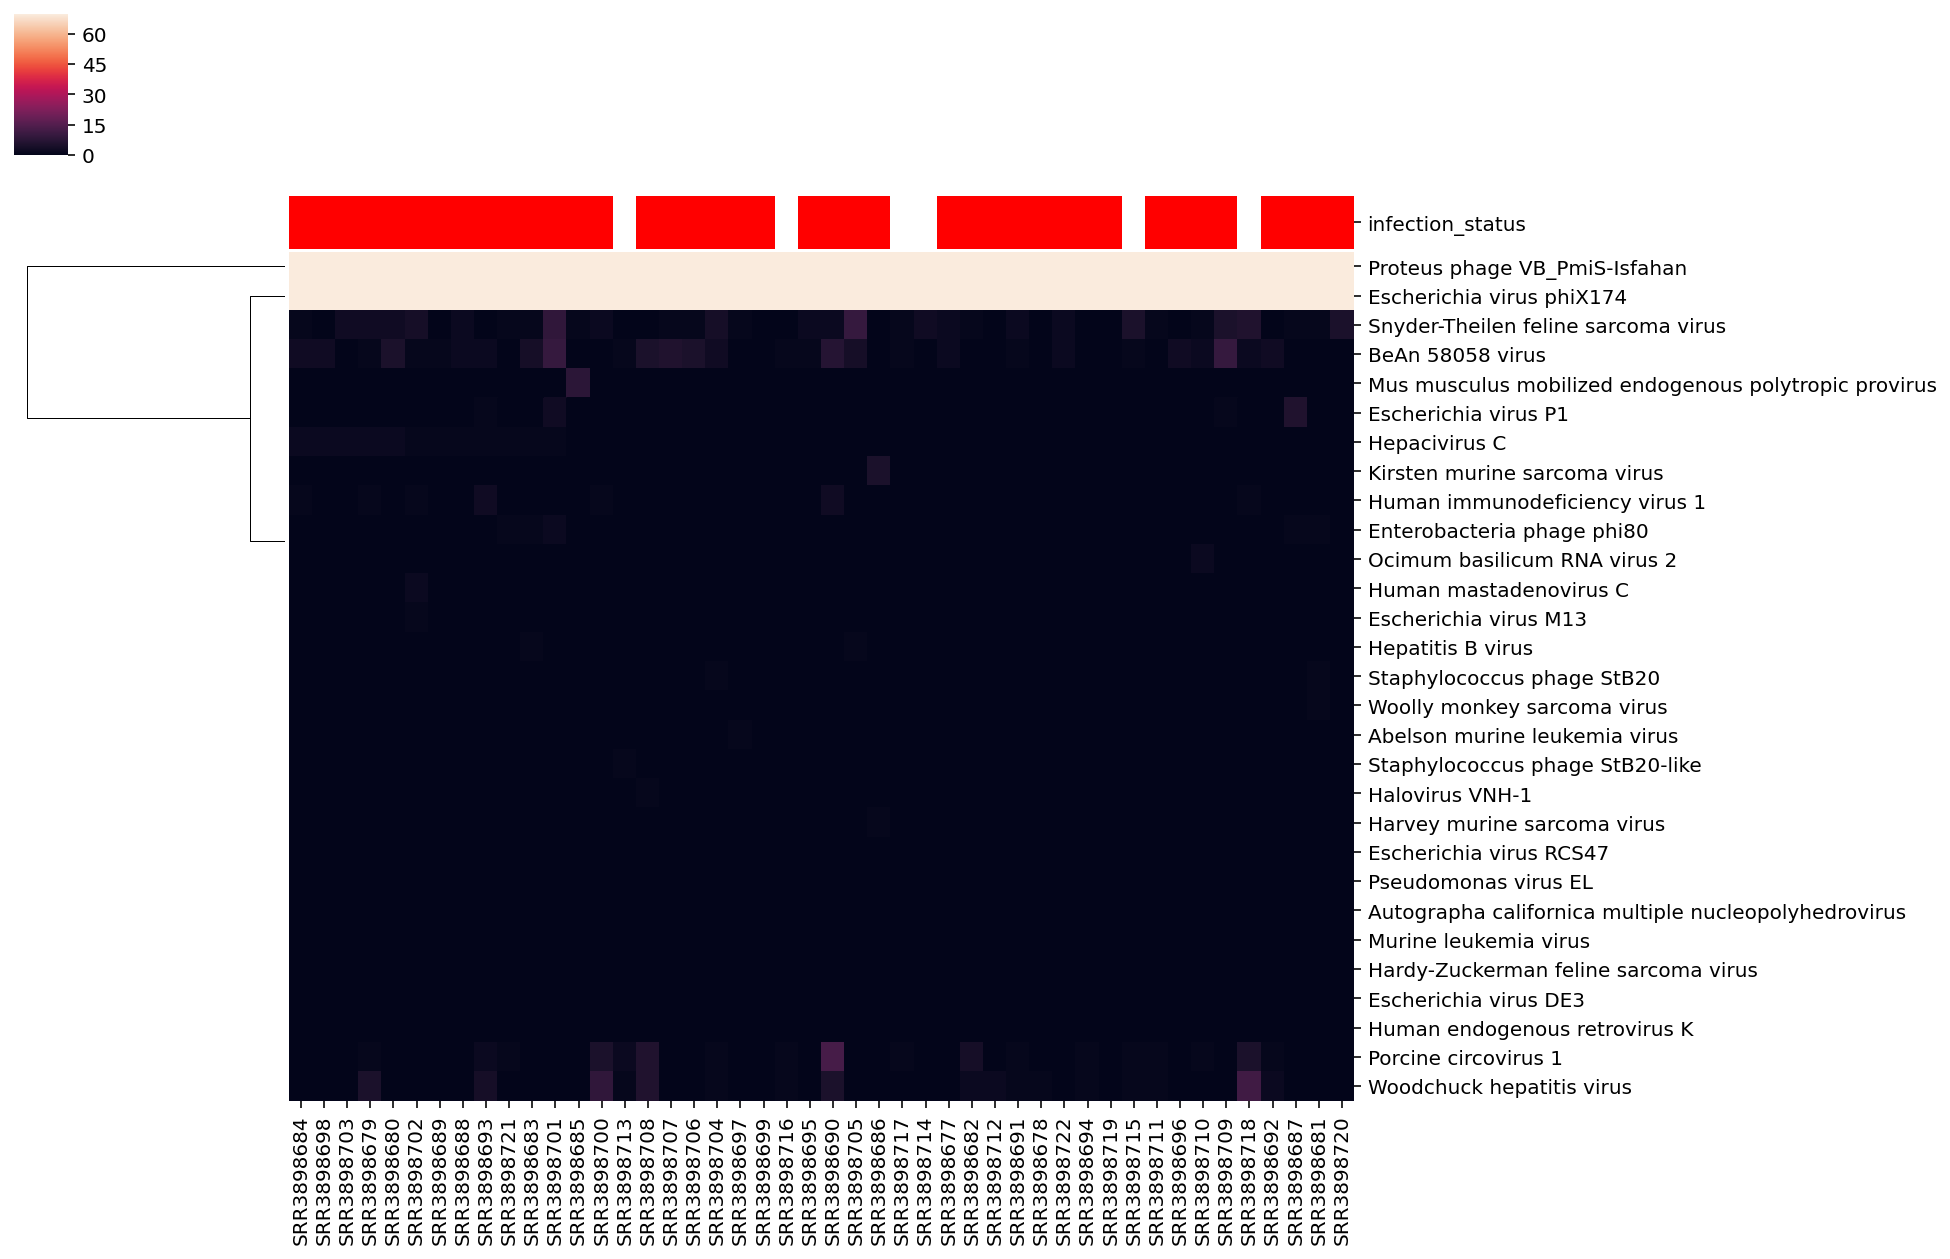

In [60]:
df_sra.loc[df_kraken2.columns, 'infection_status']

lut = dict(zip(['HCV', 'non-HCV'], "rw"))
col_colors = df_sra.loc[df_kraken2.columns, 'infection_status'].map(lut)
df_p = df_kraken2[list(df_kraken2.loc['          Hepacivirus C', :].sort_values(ascending=False).index)]
df_p.index = ['Proteus phage VB_PmiS-Isfahan',
       'Escherichia virus DE3',
       'Enterobacteria phage phi80',
       'Escherichia virus phiX174',
       'Human endogenous retrovirus K',
       'Snyder-Theilen feline sarcoma virus',
       'Hepacivirus C', 'BeAn 58058 virus',
       'Hepatitis B virus',
       'Hardy-Zuckerman feline sarcoma virus',
       'Human immunodeficiency virus 1',
       'Kirsten murine sarcoma virus',
       'Murine leukemia virus',
       'Harvey murine sarcoma virus',
       'Autographa californica multiple nucleopolyhedrovirus',
       'Porcine circovirus 1', 'Woodchuck hepatitis virus',
       'Escherichia virus P1', 'Pseudomonas virus EL',
       'Staphylococcus phage StB20', 'Halovirus VNH-1',
       'Staphylococcus phage StB20-like',
       'Woolly monkey sarcoma virus',
       'Human mastadenovirus C', 'Escherichia virus M13',
       'Escherichia virus RCS47',
       'Ocimum basilicum RNA virus 2',
       'Mus musculus mobilized endogenous polytropic provirus',
       'Abelson murine leukemia virus']
g = sns.clustermap(df_p, 
                   col_cluster=False, col_colors=col_colors, vmin=0, vmax=70, figsize=(12,10))
plt.savefig('img/heatmap.kraken22.pdf', bbox_inches='tight')

In [96]:
df_kraken2.index

Index(['            Proteus phage VB_PmiS-Isfahan',
       '          Escherichia virus DE3',
       '            Enterobacteria phage phi80',
       '          Escherichia virus phiX174',
       '            Human endogenous retrovirus K',
       '            Snyder-Theilen feline sarcoma virus',
       '          Hepacivirus C', '          BeAn 58058 virus',
       '        Hepatitis B virus',
       '            Hardy-Zuckerman feline sarcoma virus',
       '            Human immunodeficiency virus 1',
       '            Kirsten murine sarcoma virus',
       '            Murine leukemia virus',
       '            Harvey murine sarcoma virus',
       '        Autographa californica multiple nucleopolyhedrovirus',
       '        Porcine circovirus 1', '        Woodchuck hepatitis virus',
       '          Escherichia virus P1', '          Pseudomonas virus EL',
       '          Staphylococcus phage StB20', '      Halovirus VNH-1',
       '          Staphylococcus phage StB20-like'

In [116]:
list_max_hcv_reads = list(df_kraken2.loc['          Hepacivirus C', :])
list_infection_status = [x=='HCV' for x in df_sra.infection_status]

# roc = roc_curve(list_infection_status, list_max_hcv_reads)
fpr, tpr, thresholds = roc_curve(list_infection_status, list_max_hcv_reads)
roc_auc_score(list_infection_status, list_max_hcv_reads)

0.65

In [117]:
pd.DataFrame([fpr, tpr, thresholds])

,0,1,2,3
0,0.0,0.000,0.0,1.0
1,0.0,0.125,0.3,1.0
2,3.0,2.000,1.0,0.0


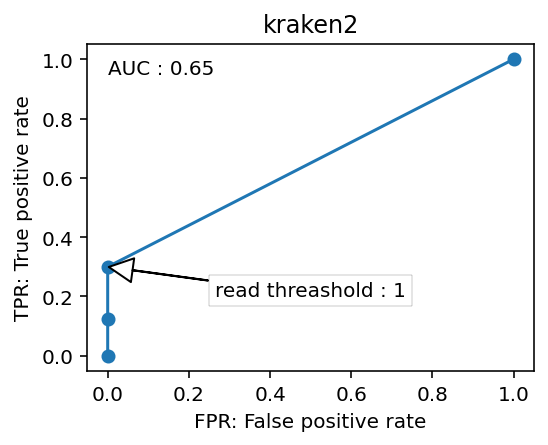

In [150]:
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid(False)
plt.annotate('read threashold : 1', xy=(0, 0.3), xytext=(0.5, 0.2),
             bbox=dict(boxstyle='square', fc='white', linewidth=0.1),
             arrowprops=dict(facecolor='white', shrink=0.01, width=0.1), color='k', horizontalalignment='center')
plt.text(0, 0.95 ,'AUC : 0.65')
plt.title('kraken2')
plt.savefig('img/ROC_kraken2.pdf', bbox_inches='tight')

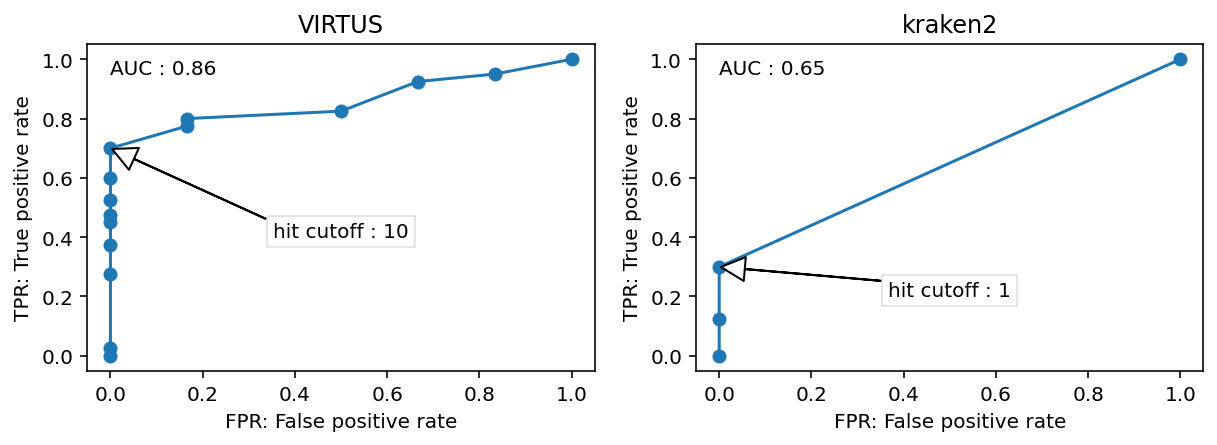

In [148]:
plt.figure(figsize=(10,3))
plt.subplot(121)
list_max_hcv_reads = list(df_virtus_hcv.max())
list_infection_status = [x=='HCV' for x in df_sra.infection_status]

# roc = roc_curve(list_infection_status, list_max_hcv_reads)
fpr, tpr, thresholds = roc_curve(list_infection_status, list_max_hcv_reads)
roc_auc_score(list_infection_status, list_max_hcv_reads)

plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.annotate('hit cutoff : 10', xy=(0, 0.7), xytext=(0.5, 0.4),
             bbox=dict(boxstyle='square', fc='white', linewidth=0.1),
             arrowprops=dict(facecolor='white', shrink=0.01, width=0.1), 
             color='k', horizontalalignment='center')
plt.grid(False)
plt.text(0, 0.95 ,'AUC : 0.86')
plt.title('VIRTUS')

plt.subplot(122)
list_max_hcv_reads = list(df_kraken2.loc['          Hepacivirus C', :])
list_infection_status = [x=='HCV' for x in df_sra.infection_status]

# roc = roc_curve(list_infection_status, list_max_hcv_reads)
fpr, tpr, thresholds = roc_curve(list_infection_status, list_max_hcv_reads)
roc_auc_score(list_infection_status, list_max_hcv_reads)

plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid(False)
plt.annotate('hit cutoff : 1', xy=(0, 0.3), xytext=(0.5, 0.2),
             bbox=dict(boxstyle='square', fc='white', linewidth=0.1),
             arrowprops=dict(facecolor='white', shrink=0.01, width=0.1), color='k', horizontalalignment='center')
plt.text(0, 0.95 ,'AUC : 0.65')
plt.title('kraken2')

plt.savefig('img/ROC.pdf', bbox_inches='tight')